# ĐỀ THI NHẬP MÔN AI

In [ ]:
#MSSV: 2374802010379
#HỌ VÀ TÊN: TRẦN ĐẠI PHÁT

# CÂU 1: TÌM BFS THEO ĐỒ THỊ BÊN DƯỚI BẰNG PYTHON

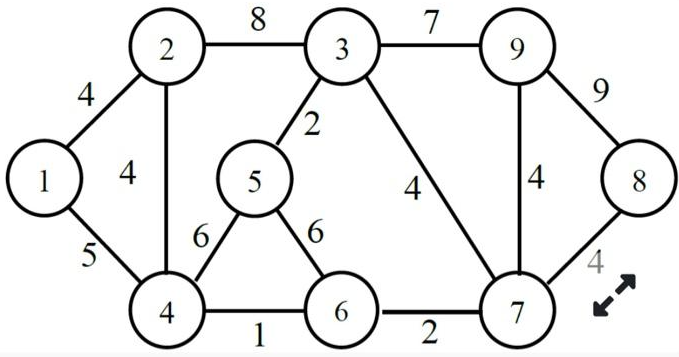

In [ ]:
#CODE HERE
from collections import deque

def bfs_weighted(graph, start, goal):
    queue = deque([(start, [start], 0)])
    visited = set([start])
    
    while queue:
        (node, path, total_weight) = queue.popleft()
        if node == goal:
            return path, total_weight
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor], total_weight + weight))
    return None, 0

graph5 = {
    '1': [('2', 4), ('4', 5)],
    '2': [('1', 4), ('4', 4), ('3', 8)],
    '3': [('2', 8), ('5', 2), ('9', 7),('7',4)],
    '4': [('1', 5), ('2', 4), ('5', 6), ('6', 1)],
    '5': [('4', 6), ('3', 2), ('6', 6)],
    '6': [('4', 1), ('5', 6), ('7', 2)],
    '7': [('6', 2), ('8', 4), ('9', 4),('3',4)],
    '8': [('7', 4), ('9', 9)],
    '9': [('3', 7), ('7', 4), ('8', 9)]
}

path, weight = bfs_weighted(graph5, '1', '9')
print("Đường đi BFS trên Đồ thị mẫu 5:", path, "Tổng trọng số:", weight)

Đường đi BFS trên Đồ thị mẫu 5: ['1', '2', '3', '9'] Tổng trọng số: 19


# CÂU 2: Tối ưu hóa hàm một biến

Tìm $x$ sao cho  
$$
f(x) = x^3 - 9x^2 + 24x - 10
$$  
đạt giá trị lớn nhất trong khoảng  
$$
x \in [0, 6].
$$

Thế hệ 1: x = 5.7233, f(x) = 25.5139
Thế hệ 2: x = 5.7233, f(x) = 20.0269
Thế hệ 3: x = 5.7233, f(x) = 20.0269
Thế hệ 4: x = 5.7233, f(x) = 20.0269
Thế hệ 5: x = 5.7845, f(x) = 20.0269
Thế hệ 6: x = 5.7845, f(x) = 21.2351
Thế hệ 7: x = 5.9502, f(x) = 21.2351
Thế hệ 8: x = 5.8673, f(x) = 24.8280
Thế hệ 9: x = 5.8521, f(x) = 22.9724
Thế hệ 10: x = 5.8416, f(x) = 22.6431
Thế hệ 11: x = 5.8416, f(x) = 22.4212
Thế hệ 12: x = 5.8416, f(x) = 22.4212
Thế hệ 13: x = 5.8416, f(x) = 22.4212
Thế hệ 14: x = 5.8400, f(x) = 22.4212
Thế hệ 15: x = 5.8400, f(x) = 22.3856
Thế hệ 16: x = 5.8400, f(x) = 22.3856
Thế hệ 17: x = 5.8400, f(x) = 22.3856
Thế hệ 18: x = 5.8443, f(x) = 22.3856
Thế hệ 19: x = 5.8443, f(x) = 22.4785
Thế hệ 20: x = 5.9319, f(x) = 22.4785
Thế hệ 21: x = 5.8870, f(x) = 24.4080
Thế hệ 22: x = 5.8870, f(x) = 23.4017
Thế hệ 23: x = 5.9466, f(x) = 23.4010
Thế hệ 24: x = 5.9948, f(x) = 24.7448
Thế hệ 25: x = 5.9948, f(x) = 25.8745
Thế hệ 26: x = 5.9948, f(x) = 25.8745
Thế hệ 27: x = 5.9948

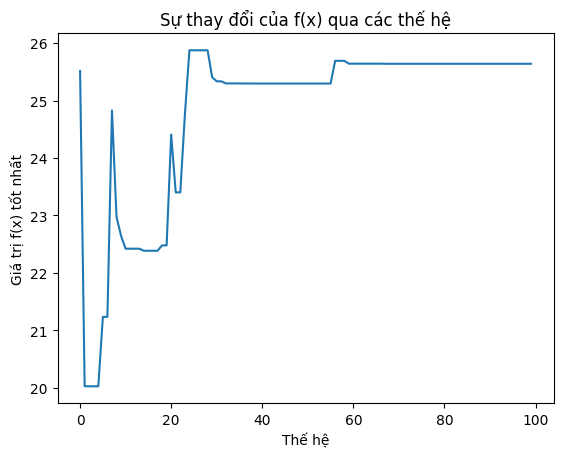


Kết quả cuối cùng: x = 5.9849, f(x) = 25.6397


In [ ]:
# CODE HERE

import numpy as np
import random
import matplotlib.pyplot as plt

def fitness_function(x):
    return x**3 - 9*x**2 + 24*x - 10  

def initialize_population(pop_size, min_val, max_val):
    return [random.uniform(min_val, max_val) for _ in range(pop_size)]

def select_parents(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx] 

def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return (parent1 + parent2) / 2
    return parent1

def mutate(individual, mutation_rate=0.1, min_val=0, max_val=6):
    if random.random() < mutation_rate:
        return random.uniform(min_val, max_val)
    return individual

def genetic_algorithm_example1(pop_size=50, generations=100, min_val=0, max_val=6):
    population = initialize_population(pop_size, min_val, max_val)
    best_fitness_history = []
        
    for generation in range(generations):
        fitness_values = [fitness_function(x) for x in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(best_fitness)
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child = crossover(parent1, parent2)
            child = mutate(child)                                  
            new_population.append(child)              
                                                                
        population = new_population           
        best_individual = population[np.argmax([fitness_function(x) for x in population])]
        print(f'Thế hệ {generation + 1}: x = {best_individual:.4f}, f(x) = {best_fitness:.4f}')
    
    best_fitness = max([fitness_function(x) for x in population])
    best_individual = population[np.argmax([fitness_function(x) for x in population])]
    
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị f(x) tốt nhất')
    plt.title('Sự thay đổi của f(x) qua các thế hệ')
    plt.show()
   
    return best_individual, best_fitness

best_x, best_f = genetic_algorithm_example1()
print(f'\nKết quả cuối cùng: x = {best_x:.4f}, f(x) = {best_f:.4f}')

# CÂU 3: Triển khai thuật toán di truyền để tìm giá trị tối ưu của hàm số sau:

$$
f(x, y) = -(x^2 + y^2) + 10x + 8y + 50
$$

trong miền xác định:

$$
x, y \in [-5, 5].
$$

1. **Triển khai thuật toán di truyền bằng Python**:
   - **Biểu diễn lời giải**: Mỗi cá thể (chromosome) là một cặp số thực $(x, y)$.
   - **Hàm đánh giá (fitness function)**: Dựa trên giá trị của $f(x, y)$, với mục tiêu tìm giá trị lớn nhất.
   - **Toán tử di truyền**:
     - **Chọn lọc**: Sử dụng phương pháp tournament selection (chọn ngẫu nhiên $k=3$ cá thể, lấy cá thể tốt nhất).
     - **Lai ghép**: Triển khai lai ghép số học (arithmetic crossover), ví dụ: $x_{\text{new}} = \alpha x_1 + (1-\alpha) x_2$, với $\alpha$ ngẫu nhiên trong $[0, 1]$.
     - **Đột biến**: Áp dụng đột biến bằng cách thêm nhiễu Gaussian (mean=0, std=0.1) vào $x$ hoặc $y$, với xác suất đột biến nhỏ.
   - **Tham số**:
     - Kích thước quần thể: 50 cá thể.
     - Số thế hệ: 100 thế hệ.
     - Xác suất lai ghép: 0.8.
     - Xác suất đột biến: 0.05.
2. **Kết quả đầu ra**:
   - In ra giá trị tối ưu (gần đúng) của $f(x, y)$ và tọa độ $(x, y)$ tương ứng.
   - In ra giá trị hàm $f(x, y)$ tốt nhất qua từng thế hệ để theo dõi sự hội tụ.

Thế hệ 1: (x, y) = (4.2017, 2.9433), g(x, y) = -88.6990
Thế hệ 2: (x, y) = (3.9885, 3.0728), g(x, y) = -89.2461
Thế hệ 3: (x, y) = (4.4291, 3.1960), g(x, y) = -89.1171
Thế hệ 4: (x, y) = (4.9188, 3.0822), g(x, y) = -90.0276
Thế hệ 5: (x, y) = (4.4003, 3.1098), g(x, y) = -90.1510
Thế hệ 6: (x, y) = (4.1857, 3.2421), g(x, y) = -89.8480
Thế hệ 7: (x, y) = (4.1857, 3.2421), g(x, y) = -89.7626
Thế hệ 8: (x, y) = (4.1857, 3.2421), g(x, y) = -89.7626
Thế hệ 9: (x, y) = (4.1857, 3.2421), g(x, y) = -89.7626
Thế hệ 10: (x, y) = (4.1703, 3.9828), g(x, y) = -89.7626
Thế hệ 11: (x, y) = (4.1560, 3.9704), g(x, y) = -90.3114
Thế hệ 12: (x, y) = (4.1560, 3.9704), g(x, y) = -90.2869
Thế hệ 13: (x, y) = (4.1658, 3.7854), g(x, y) = -90.2869
Thế hệ 14: (x, y) = (4.9795, 3.5976), g(x, y) = -90.2581
Thế hệ 15: (x, y) = (4.5723, 3.6911), g(x, y) = -90.8376
Thế hệ 16: (x, y) = (4.5725, 3.6795), g(x, y) = -90.7217
Thế hệ 17: (x, y) = (4.5361, 3.7505), g(x, y) = -90.7145
Thế hệ 18: (x, y) = (4.5361, 3.7505), g(

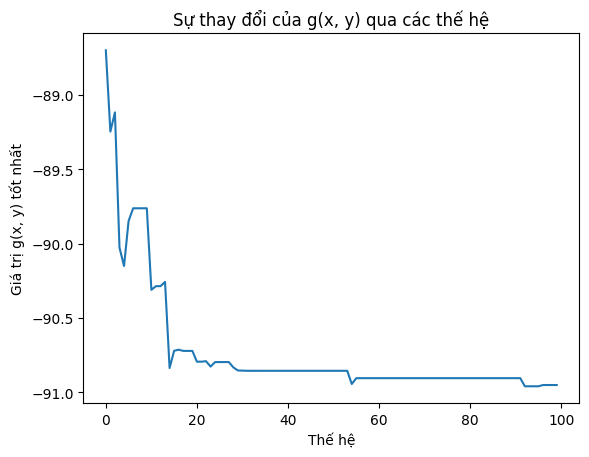


Kết quả cuối cùng: (x, y) = (4.7815, 3.9972), g(x, y) = -90.9523


In [ ]:
#CODE HERE
def fitness_function_2d(x, y):
    return -(x**2 + y**2) + 10*x +8*y + 50  

def initialize_population_2d(pop_size, min_val, max_val):
    return [(random.uniform(min_val, max_val), random.uniform(min_val, max_val)) for _ in range(pop_size)]

def select_parents_2d(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx]

def crossover_2d(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return ((parent1[0] + parent2[0]) / 2, (parent1[1] + parent2[1]) / 2)
    return parent1

def mutate_2d(individual, mutation_rate=0.05, min_val=-5, max_val=5):
    x, y = individual
    if random.random() < mutation_rate:
        x = random.uniform(min_val, max_val)
    if random.random() < mutation_rate:
        y = random.uniform(min_val, max_val)
    return (x, y)

def genetic_algorithm_example2(pop_size=50, generations=100, min_val=-5, max_val=5):
    population = initialize_population_2d(pop_size, min_val, max_val)
    best_fitness_history = []
    
    for generation in range(generations):
        fitness_values = [fitness_function_2d(x, y) for x, y in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(-best_fitness)  
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents_2d(population, fitness_values)
            parent2 = select_parents_2d(population, fitness_values)
            child = crossover_2d(parent1, parent2)
            child = mutate_2d(child)
            new_population.append(child)
        
        population = new_population
        best_individual = population[np.argmax([fitness_function_2d(x, y) for x, y in population])]
        print(f'Thế hệ {generation + 1}: (x, y) = ({best_individual[0]:.4f}, {best_individual[1]:.4f}), g(x, y) = {-best_fitness:.4f}')
    
    best_fitness = max([fitness_function_2d(x, y) for x, y in population])
    best_individual = population[np.argmax([fitness_function_2d(x, y) for x, y in population])]
    
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị g(x, y) tốt nhất')
    plt.title('Sự thay đổi của g(x, y) qua các thế hệ')
    plt.show()
    
    return best_individual, -best_fitness

best_xy, best_g = genetic_algorithm_example2()
print(f'\nKết quả cuối cùng: (x, y) = ({best_xy[0]:.4f}, {best_xy[1]:.4f}), g(x, y) = {best_g:.4f}')

# CÂU 4: NAIVE BAYES 

**Tập dữ liệu**: Dữ liệu về quyết định mua máy tính của 14 khách hàng, với các đặc trưng: Age (youth, middle_aged, senior), Income (low, medium, high), Student (yes, no), Credit_rating (fair, excellent), và nhãn Buys_computer (yes, no).

| ID | Age         | Income | Student | Credit_rating | Buys_computer |
|----|-------------|--------|---------|---------------|---------------|
| 1  | youth       | high   | no      | fair          | no            |
| 2  | youth       | high   | no      | excellent     | no            |
| 3  | middle_aged | high   | no      | fair          | yes           |
| 4  | senior      | medium | no      | fair          | yes           |
| 5  | senior      | low    | yes     | fair          | yes           |
| 6  | senior      | low    | yes     | excellent     | no            |
| 7  | middle_aged | low    | yes     | excellent     | yes           |
| 8  | youth       | medium | no      | fair          | no            |
| 9  | youth       | low    | yes     | fair          | yes           |
| 10 | senior      | medium | yes     | fair          | yes           |
| 11 | youth       | medium | yes     | excellent     | yes           |
| 12 | middle_aged | medium | no      | excellent     | yes           |
| 13 | middle_aged | high   | yes     | fair          | yes           |
| 14 | senior      | medium | no      | excellent     | no            |

1. **Triển khai thuật toán Naive Bayes từ đầu**:
   - **Biểu diễn dữ liệu**: Lưu trữ tập dữ liệu trong chương trình (dùng danh sách, dictionary, hoặc pandas DataFrame).
   - **Tính xác suất**:
     - Tính xác suất trước (prior probabilities) cho lớp Buys_computer (Yes/No).
     - Tính xác suất có điều kiện (likelihood) cho từng giá trị của các đặc trưng (Age, Income, Student, Credit_rating) đối với từng lớp.
   - **Dự đoán**: Viết hàm dự đoán nhãn Buys_computer cho một mẫu dữ liệu mới dựa trên thuật toán Naive Bayes.
   - **Xử lý dữ liệu categorical**: Chuyển đổi các giá trị categorical thành dạng số hoặc xử lý trực tiếp trong tính toán xác suất.
2. **Dự đoán mẫu mới**:
   - Sử dụng chương trình để dự đoán nhãn Buys_computer cho mẫu: Age = youth, Income = medium, Student = yes, Credit_rating = fair.
   - In ra xác suất dự đoán cho cả hai lớp (Yes và No) và nhãn cuối cùng.

In [19]:
import pandas as pd
from collections import defaultdict

data = {
    "Age": ["youth", "youth", "middle_aged", "senior", "senior", "senior", "middle_aged", "youth", "youth", "senior", "youth", "middle_aged", "middle_aged", "senior"],
    "Income": ["high", "high", "high", "medium", "low", "low", "low", "medium", "low", "medium", "medium", "medium", "high", "medium"],
    "Student": ["no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "no", "yes", "no"],
    "Credit_rating": ["fair", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "excellent"],
    "Buys_computer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
}
df = pd.DataFrame(data)

total = len(df)
count_yes = len(df[df["Buys_computer"] == "yes"])
count_no = len(df[df["Buys_computer"] == "no"])

P_yes = count_yes / total
P_no = count_no / total

features = ["Age", "Income", "Student", "Credit_rating"]
likelihood = {
    "yes": defaultdict(lambda: defaultdict(int)),
    "no": defaultdict(lambda: defaultdict(int)),
}

for _, row in df.iterrows():
    label = row["Buys_computer"]
    for feature in features:
        value = row[feature]
        likelihood[label][feature][value] += 1

for label in ["yes", "no"]:
    label_count = count_yes if label == "yes" else count_no
    for feature in features:
        for value in likelihood[label][feature]:
            likelihood[label][feature][value] /= label_count

def predict(sample):
    prob_yes = P_yes
    prob_no = P_no

    for feature in features:
        value = sample[feature]
        prob_yes *= likelihood["yes"][feature].get(value, 1e-6)  
        prob_no *= likelihood["no"][feature].get(value, 1e-6)
        total_prob = prob_yes + prob_no
    prob_yes_norm = prob_yes / total_prob
    prob_no_norm = prob_no / total_prob
    prediction = "yes" if prob_yes > prob_no else "no"

    return prob_yes_norm, prob_no_norm, prediction

test_sample = {"Age": "youth", "Income": "medium", "Student": "yes", "Credit_rating": "fair"}
p_yes, p_no, pred = predict(test_sample)

print("Mẫu mới:", test_sample)
print("Xác suất Buys_computer = yes:", round(p_yes, 4))
print("Xác suất Buys_computer = no :", round(p_no, 4))
print("Kết quả dự đoán cuối cùng:", pred)

Mẫu mới: {'Age': 'youth', 'Income': 'medium', 'Student': 'yes', 'Credit_rating': 'fair'}
Xác suất Buys_computer = yes: 0.8045
Xác suất Buys_computer = no : 0.1955
Kết quả dự đoán cuối cùng: yes
